# Your info

Full name:Ali Sedaghi

Student ID:97521378

# Q1. Hopfield

## Q1.2

In [1]:
# Q1.2_graded
# Imports

import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# Q1.2_graded
# Hopfield Class
# Fully vectorized operations
# Activation can be tanh or sign

class Hopfield:
  def __init__(self, N):
    self.N = N
    self.P = 0
    self.W = np.zeros((N, N), dtype=np.int)

  def linear_activation(self, a):
    u = np.dot(a, self.W)
    return u
    
  def sign_activation(self, u):
    a = np.sign(u)
    return a

  def tanh_activation(self, u):
    a = np.tanh(u)
    return a

  def activation(self, u, activation):
    if activation == 'tanh':
      return self.tanh_activation(u)
    return self.sign_activation(u)

  def compute_W(self, patterns):
    temp = np.dot(patterns.T, patterns)
    np.fill_diagonal(temp, 0.0)
    self.W = temp

  def compute_diff(self, a0, a):
    temp = np.equal(a0, a)
    true_count = np.count_nonzero(temp)
    return self.P - true_count

  def compute_accuracy(self, diff_count):
    return (self.P - diff_count) / self.P

  def compute_energy(self, a):
    """
      Returns a number
    """
    e =  -1 * np.sum(np.multiply(np.outer(a, a), self.W))
    return e

  def converged(self, a, a_before):
    """
    a shape: (N, )
    if a and a_before are same return True
    """
    return np.array_equal(a, a_before)
        
  def train(self, X):
    """
    X: patterns vector: numpy array of shape: (K, N)
    K: number of patterns
    N: number of neurons
    """
    self.compute_W(X)
    self.P = X.shape[1]
    return self.W

  def predict(self, y, epochs, activation):
    """
    Inputs:
      y: test input: an array
    Outputs:
      yp: Best activation across all epochs  (N,)
      acc: Accuracy of returned a. Number
      e: Energy of returned a. Number
    """
    A = []
    a = np.array(y)
    A.append(a)

    # D shape: (epochs+1, )
    D = []
    D.append(math.inf)
    
    iterator = tqdm(range(epochs))
    for i in iterator:
      u = self.linear_activation(a)
      a = self.activation(u, activation)
      d = self.compute_diff(y, a)

      A.append(a)
      D.append(d)

      # Early stop
      if self.converged(A[-1], A[-2]):
        iterator.close()
        if i == 0:
          print("Input is already stable.")
        else:
          print("Consecutive same pattern in iteration:", i)
        break
    
    A = np.array(A)
    D = np.array(D)

    # Find nearest pattern
    index = np.argmin(D)
    yp = A[index]
    print("Nearest pattern found in iteration:", index)

    # Accuracy
    acc = self.compute_accuracy(D[index])

    # Energy
    e = self.compute_energy(yp)

    return yp, acc, e

In [3]:
# Q1.2_graded
# Train on Question 1.1

hopfield = Hopfield(4)

X = np.array([
  [1, 1, 1, 1],
  [-1, -1, -1, -1],
  [1, 1, -1, -1],
  [-1, -1, 1, 1]
])

a = [-1, 1, -1, 1]

W = hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Weight Matrix:", W)
print("Test pattern:", a)
print("Nearest pattern found:", yp)
print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Nearest pattern found in iteration: 2
Weight Matrix: [[0 4 0 0]
 [4 0 0 0]
 [0 0 0 4]
 [0 0 4 0]]
Test pattern: [-1, 1, -1, 1]
Nearest pattern found: [-1  1 -1  1]
Accuracy: 100.0 %
Energy: 16


In [4]:
# Q1.2_graded
# Train on Question 1.2

hopfield = Hopfield(6)

X = np.array([
  [1, -1, 1, -1, 1, -1],
  [1, 1, 1, -1, -1, -1],
])

a = [1, 1, 1, -1, -1, -1]

hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Test pattern:", a)
print("Nearest pattern found:", yp)
print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Input is already stable.
Nearest pattern found in iteration: 1
Test pattern: [1, 1, 1, -1, -1, -1]
Nearest pattern found: [ 1  1  1 -1 -1 -1]
Accuracy: 100.0 %
Energy: -28


In [5]:
# Q1.2_graded
# Train on Question 1.2
# With new pattern isnide X
# Case 1

hopfield = Hopfield(6)

X = np.array([
  [1, -1, 1, -1, 1, -1],
  [1, 1, 1, -1, -1, -1],
  [-1, 1, 1, -1, -1, -1],
])

a = [1, 1, 1, -1, -1, -1]

hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Test pattern:", a)
print("Nearest pattern found:", yp)
print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Input is already stable.
Nearest pattern found in iteration: 1
Test pattern: [1, 1, 1, -1, -1, -1]
Nearest pattern found: [ 1  1  1 -1 -1 -1]
Accuracy: 100.0 %
Energy: -38


In [6]:
# Q1.2_graded
# Train on Question 1.2
# With new pattern as a
# Case 2

hopfield = Hopfield(6)

X = np.array([
  [1, -1, 1, -1, 1, -1],
  [1, 1, 1, -1, -1, -1],
])

a = [-1, 1, 1, -1, -1, -1]

hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Test pattern:", a)
print("Nearest pattern found:", yp)
print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Consecutive same pattern in iteration: 1
Nearest pattern found in iteration: 1
Test pattern: [-1, 1, 1, -1, -1, -1]
Nearest pattern found: [ 1  1  1 -1 -1 -1]
Accuracy: 83.33333333333334 %
Energy: -28


In [7]:
# Q1.2_graded
# Train on Question 1.2
# With new pattern isnide X, and as a
# Case 3

hopfield = Hopfield(6)

X = np.array([
  [1, -1, 1, -1, 1, -1],
  [1, 1, 1, -1, -1, -1],
  [-1, 1, 1, -1, -1, -1]
])

a = [-1, 1, 1, -1, -1, -1]

hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Test pattern:", a)
print("Nearest pattern found:", yp)
print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Consecutive same pattern in iteration: 1
Nearest pattern found in iteration: 1
Test pattern: [-1, 1, 1, -1, -1, -1]
Nearest pattern found: [ 1  1  1 -1 -1 -1]
Accuracy: 83.33333333333334 %
Energy: -38


## Q1.3

In [8]:
# Q1.3_graded
# Imports

import math
from PIL import Image, ImageFont

In [9]:
# Q1.3_graded
# Image utility functions

def IMG_to_SGN(image):
  """
  Input: an image file
  Output: 2d array of -1 and +1
  """
  img = image.convert(mode="L")
  img_arr = np.asarray(img, dtype=np.uint8)
  sgn_arr = np.zeros(img_arr.shape, dtype=np.int8)
  sgn_arr[img_arr > (255 / 2)] = 1
  sgn_arr[sgn_arr == 0] = -1
  return sgn_arr

def add_noise(image, percent):
  """
  Input: an image file
  Output: an image file with noise added
  """
  img_arr = np.asarray(image, dtype=np.uint8)
  mean = np.mean(img_arr)
  std = np.std(img_arr)
  rand_arr = np.random.normal(mean, std, img_arr.shape)
  img_arr = img_arr + rand_arr * percent
  img = Image.fromarray(img_arr)
  return img

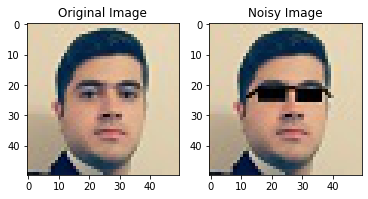

In [10]:
# Q1.3_graded
# Loading my image + noise

!wget -N -q "https://raw.githubusercontent.com/nikomadol/datasets/main/me.jpg"
!wget -N -q "https://raw.githubusercontent.com/nikomadol/datasets/main/me_noise.jpg"

img_me = Image.open('me.jpg')
img_noise = Image.open('me_noise.jpg')

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.title.set_text('Original Image')
ax1.imshow(img_me)

ax2.title.set_text('Noisy Image')
ax2.imshow(img_noise)

In [11]:
# Q1.3_graded
# Data preprocessing

# shape: (50, 50)
sgn_me = IMG_to_SGN(img_me)
sgn_noise = IMG_to_SGN(img_noise)

# shape: (1, 2500)
X = sgn_me.flatten().reshape(1, -1)

# shape: (256,)
a = sgn_noise.flatten()

In [12]:
# Q1.3_graded
# Training

hopfield = Hopfield(2500)

hopfield.train(X)
yp, acc, e = hopfield.predict(a, epochs=5, activation="sign")

print("Accuracy:", acc * 100, "%")
print("Energy:", e)


Nearest pattern found in iteration: 1
Accuracy: 97.76 %
Energy: -6247500


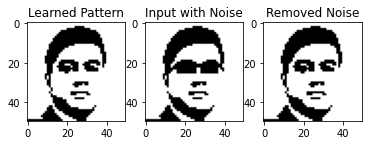

In [13]:
# Q1.3_graded
# Results

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.title.set_text('Learned Pattern')
ax1.imshow(X.reshape(50, 50), cmap='gray')

ax2.title.set_text('Input with Noise')
ax2.imshow(a.reshape(50, 50), cmap='gray')

ax3.title.set_text('Removed Noise')
ax3.imshow(yp.reshape(50, 50).astype(int), cmap='gray')

In [14]:
# Q1.3_graded
# Fetch Arial font

!wget -N -q "https://raw.githubusercontent.com/nikomadol/datasets/main/Arial.ttf"

In [15]:
# Q1.3_graded
# Utility functions

def create_dataset(charset, font_size, size, noise):
  font = ImageFont.truetype("Arial.ttf", font_size)

  X = []
  Y = []

  for char in charset:
    im = Image.Image()._new(font.getmask(char)).resize((size, size))
    im_noise = add_noise(im, noise)
    sgn_arr = IMG_to_SGN(im)
    sgn_noise_arr = IMG_to_SGN(im_noise)
    X.append(sgn_arr.flatten())
    Y.append(sgn_noise_arr.flatten())
  
  X = np.array(X)
  Y = np.array(Y)

  return X, Y

def plot_result(X, Y, Yp):
  n = X.shape[0]
  size = int(math.sqrt(X.shape[1]))

  fig, axs = plt.subplots(10, 3)

  for i in range(n):
    axs[i, 0].imshow(X[i].reshape(size, size), cmap='gray')
    axs[i, 1].imshow(Y[i].reshape(size, size), cmap='gray')
    axs[i, 2].imshow(Yp[i].reshape(size, size).astype(int), cmap='gray')

In [16]:
# Q1.3_graded
# Wrapper for training and results

def do_the_job(font_size, noise):
  size = int(font_size * .75)
  X, Y = create_dataset("ABCDEFGHIJ", font_size, size, noise)

  hopfield = Hopfield(size**2)
  hopfield.train(X)

  Yp = []
  accs = []
  for a in Y:
    yp, acc, e = hopfield.predict(a, epochs=5000, activation="sign")
    Yp.append(yp)
    accs.append(acc)

  print("Accuracy:", acc * 100, "%")
  print("Energy:", e)
  print()

  Yp = np.array(Yp)
  accs = np.array(accs)

  print()
  print("======= Final Result =======")
  print("Font size:", font_size)
  print("Noise:", noise * 100, "%")
  print("Average accuracy:", np.average(accs) * 100, "%")
  plot_result(X, Y, Yp)


Nearest pattern found in iteration: 205



Nearest pattern found in iteration: 465



Nearest pattern found in iteration: 139



Nearest pattern found in iteration: 408



Nearest pattern found in iteration: 506



Nearest pattern found in iteration: 787



Nearest pattern found in iteration: 270



Nearest pattern found in iteration: 43



Nearest pattern found in iteration: 120



Nearest pattern found in iteration: 353
Accuracy: 84.02777777777779 %
Energy: -58992


======= Final Result =======
Font size: 16
Noise: 10.0 %
Average accuracy: 90.34722222222221 %


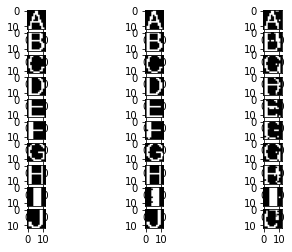

In [17]:
# Q1.3_graded

font_size = 16
noise = 0.1
do_the_job(font_size, noise)


Nearest pattern found in iteration: 619



Nearest pattern found in iteration: 339



Nearest pattern found in iteration: 767



Nearest pattern found in iteration: 484



Nearest pattern found in iteration: 854



Nearest pattern found in iteration: 367



Nearest pattern found in iteration: 638



Nearest pattern found in iteration: 246



Nearest pattern found in iteration: 258



Nearest pattern found in iteration: 479
Accuracy: 84.72222222222221 %
Energy: -39836


======= Final Result =======
Font size: 16
Noise: 30.0 %
Average accuracy: 89.58333333333333 %


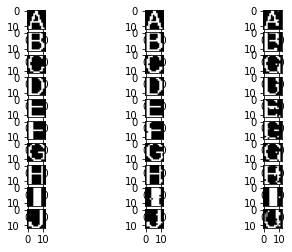

In [18]:
# Q1.3_graded

font_size = 16
noise = 0.3
do_the_job(font_size, noise)


Nearest pattern found in iteration: 248



Nearest pattern found in iteration: 622



Nearest pattern found in iteration: 78



Nearest pattern found in iteration: 570



Nearest pattern found in iteration: 264



Nearest pattern found in iteration: 585



Nearest pattern found in iteration: 996



Nearest pattern found in iteration: 120



Nearest pattern found in iteration: 433



Nearest pattern found in iteration: 145
Accuracy: 75.69444444444444 %
Energy: -58992


======= Final Result =======
Font size: 16
Noise: 60.0 %
Average accuracy: 82.84722222222221 %


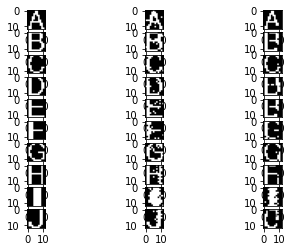

In [19]:
# Q1.3_graded

font_size = 16
noise = 0.6
do_the_job(font_size, noise)


Nearest pattern found in iteration: 2212



Nearest pattern found in iteration: 2903



Nearest pattern found in iteration: 4650



Nearest pattern found in iteration: 4661



Nearest pattern found in iteration: 3491



Nearest pattern found in iteration: 3372



Nearest pattern found in iteration: 3274



Nearest pattern found in iteration: 1341



Nearest pattern found in iteration: 544



Nearest pattern found in iteration: 3884
Accuracy: 84.72222222222221 %
Energy: -328056


======= Final Result =======
Font size: 32
Noise: 10.0 %
Average accuracy: 89.32291666666666 %


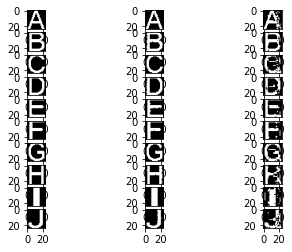

In [20]:
# Q1.3_graded

font_size = 32
noise = 0.1
do_the_job(font_size, noise)


Nearest pattern found in iteration: 4618



Nearest pattern found in iteration: 2584



Nearest pattern found in iteration: 1955



Nearest pattern found in iteration: 431



Nearest pattern found in iteration: 4685



Nearest pattern found in iteration: 850



Nearest pattern found in iteration: 1964



Nearest pattern found in iteration: 1883



Nearest pattern found in iteration: 98



Nearest pattern found in iteration: 4309
Accuracy: 89.58333333333334 %
Energy: -695408


======= Final Result =======
Font size: 32
Noise: 30.0 %
Average accuracy: 87.39583333333334 %


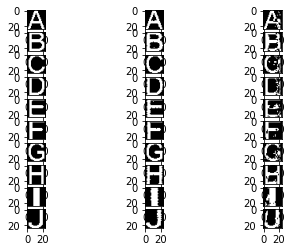

In [21]:
# Q1.3_graded

font_size = 32
noise = 0.3
do_the_job(font_size, noise)


Nearest pattern found in iteration: 447



Nearest pattern found in iteration: 4701



Nearest pattern found in iteration: 4106



Nearest pattern found in iteration: 3849



Nearest pattern found in iteration: 4927



Nearest pattern found in iteration: 1943



Nearest pattern found in iteration: 1



Nearest pattern found in iteration: 1884



Nearest pattern found in iteration: 2460



Nearest pattern found in iteration: 4946
Accuracy: 84.20138888888889 %
Energy: -536480


======= Final Result =======
Font size: 32
Noise: 60.0 %
Average accuracy: 80.71180555555554 %


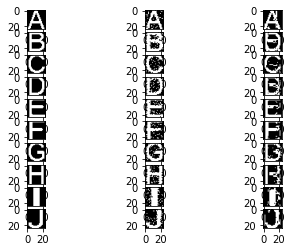

In [22]:
# Q1.3_graded

font_size = 32
noise = 0.6
do_the_job(font_size, noise)


Nearest pattern found in iteration: 2246



Nearest pattern found in iteration: 52



Nearest pattern found in iteration: 1364



Nearest pattern found in iteration: 2652



Nearest pattern found in iteration: 4598



Nearest pattern found in iteration: 1368



Nearest pattern found in iteration: 2782



Nearest pattern found in iteration: 396



Nearest pattern found in iteration: 105



Nearest pattern found in iteration: 3657
Accuracy: 90.27777777777779 %
Energy: -7127976


======= Final Result =======
Font size: 64
Noise: 10.0 %
Average accuracy: 88.125 %


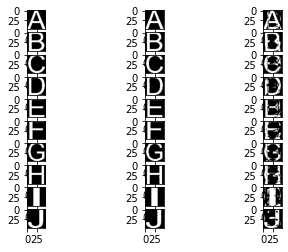

In [23]:
# Q1.3_graded

font_size = 64
noise = 0.1
do_the_job(font_size, noise)


Nearest pattern found in iteration: 2867



Nearest pattern found in iteration: 2375



Nearest pattern found in iteration: 3548



Nearest pattern found in iteration: 795



Nearest pattern found in iteration: 1216



Nearest pattern found in iteration: 3662



Nearest pattern found in iteration: 4504



Nearest pattern found in iteration: 1268



Nearest pattern found in iteration: 1969



Nearest pattern found in iteration: 3376
Accuracy: 88.671875 %
Energy: -7809648


======= Final Result =======
Font size: 64
Noise: 30.0 %
Average accuracy: 88.97569444444444 %


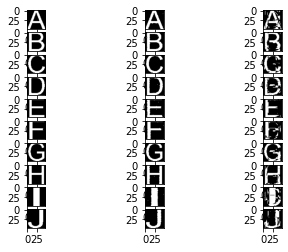

In [24]:
# Q1.3_graded

font_size = 64
noise = 0.3
do_the_job(font_size, noise)


Nearest pattern found in iteration: 3069



Nearest pattern found in iteration: 199



Nearest pattern found in iteration: 249



Nearest pattern found in iteration: 1716



Nearest pattern found in iteration: 1588



Nearest pattern found in iteration: 3398



Nearest pattern found in iteration: 290



Nearest pattern found in iteration: 2287



Nearest pattern found in iteration: 977



Nearest pattern found in iteration: 4626
Accuracy: 81.07638888888889 %
Energy: -6733664


======= Final Result =======
Font size: 64
Noise: 60.0 %
Average accuracy: 81.9140625 %


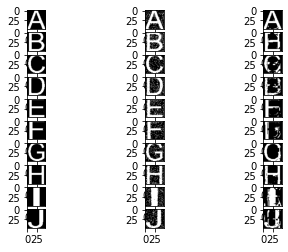

In [25]:
# Q1.3_graded

font_size = 64
noise = 0.6
do_the_job(font_size, noise)

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='green'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI992_HW3.ipynb`
    - `Q1.2.py`
    - `Q1.3.py`
    - `inverted_pendulum.fcl`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.